<a href="https://colab.research.google.com/github/ujjwalbb30/DATA_602_Twitter_Sentiment_Analysis_Stock_Market_Prediction/blob/main/python_notebooks/Step_1_initial_EDA_VDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Tweet and Stock Datasets**

## **Companies of Interest: Apple, Amazon, Tesla, Microsoft, Google**

## Exploring the following Datasets

### (1) Company.csv - Contains each Company's ticker_symbol (it is a symbol used in stock market to represent the company) against its name

### (2) Company_Tweet.csv - Contains the tweet_id (unique id assigned to each tweet) against the ticker_symbol of the company associated with that tweet_id. Since a tweet can be associated with multiple companies, we have multiple entries of same tweet_id in this dataset.

### (3) CompanyValues.csv - contains last 10 years (2010 to 2020) of following stock market data for the companies of interest:    

▶ open_value: the value at which the first stock is traded

▶ close_value: the value at which the last stock is traded

▶ low_value: the lowest value at which the stock was traded in a day

▶ high_value: the highest value at which the stock was traded in a day

### (4) Tweet.csv - Contains the details (like author, Body, like_num, comment_num etc.) against each unique tweet_id

## **Importing 'Company.csv' and 'Company_Tweet.csv'**

In [ ]:
# importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mounting the google drive to access datasets
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# importing the 'Company.csv' dataset
company_name_ts = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Company.csv')

# viewing the dataframe and general info
print('the dataframe:\n',company_name_ts)
print('\ngeneral info:')
print('\ndataframe shape:\n',company_name_ts.shape)
print(company_name_ts.info())

the dataframe:
   ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc
5          MSFT    Microsoft

general info:

dataframe shape:
 (6, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None


In [ ]:
# importing the 'Company_Tweet.csv' dataset
company_tweet_id_ts = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Company_Tweet.csv')

# viewing the dataframe and general info
print('the dataframe:\n',company_tweet_id_ts)
print('\ngeneral info:')
print('\ndataframe shape:\n',company_tweet_id_ts.shape)
print(company_tweet_id_ts.info())

the dataframe:
                     tweet_id ticker_symbol
0         550803612197457920          AAPL
1         550803610825928706          AAPL
2         550803225113157632          AAPL
3         550802957370159104          AAPL
4         550802855129382912          AAPL
...                      ...           ...
4336440  1212158772015034369          TSLA
4336441  1212159099632267268          TSLA
4336442  1212159184931717120          TSLA
4336443  1212159838882533376          TSLA
4336444  1212160015332728833          TSLA

[4336445 rows x 2 columns]

general info:

dataframe shape:
 (4336445, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB
None


## **Viewing Percetange of Tweets for each company**

total unique tweet count:
 3717964

counts of tweets for each company:
 AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

percentage of Apple tweets: 38.33 %

percentage of Tesla tweets: 29.5 %

percentage of Amazon tweets: 19.33 %

percentage of Microsoft tweets: 10.11 %

percentage of Google 1 tweets: 10.56 %

percentage of Google 2 tweets: 8.81 %


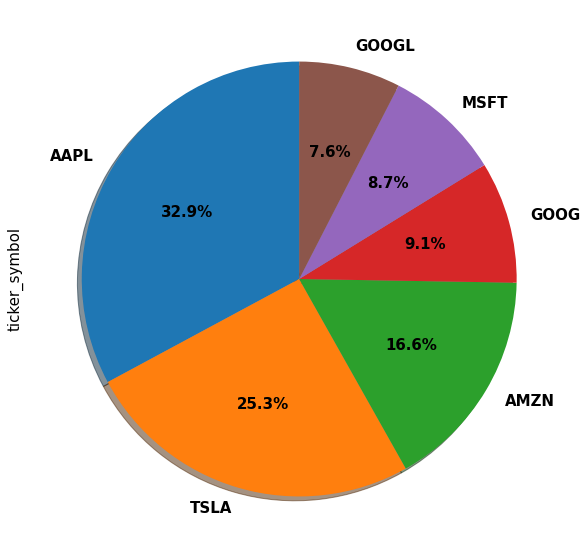

In [ ]:
# counting total number of unique tweets
total_tweet_count = len(company_tweet_id_ts['tweet_id'].unique())
print('total unique tweet count:\n',total_tweet_count)

# counting the number of tweets for each company
c1 = company_tweet_id_ts['ticker_symbol'].value_counts()
print('\ncounts of tweets for each company:\n',c1)

# calculating the percentage of tweets for each company
c_aapl, c_tsla, c_amzn, c_goog, c_msft, c_googl = c1[0], c1[1], c1[2], c1[3], c1[4], c1[5]

print('\npercentage of Apple tweets:',round(c_aapl*100/total_tweet_count,2),'%')
print('\npercentage of Tesla tweets:',round(c_tsla*100/total_tweet_count,2),'%')
print('\npercentage of Amazon tweets:',round(c_amzn*100/total_tweet_count,2),'%')
print('\npercentage of Microsoft tweets:',round(c_msft*100/total_tweet_count,2),'%')
print('\npercentage of Google 1 tweets:',round(c_goog*100/total_tweet_count,2),'%')
print('\npercentage of Google 2 tweets:',round(c_googl*100/total_tweet_count,2),'%')

# plotting the pie plot
plt.rcParams.update({'font.size': 15,'font.weight':'bold'}) # updating the font size
c1.plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, figsize=(10,10))

## **Viewing common tweets between companies**

In [ ]:
# preparing 'tweet_id' series data for each company
apple_tweets = pd.Series(company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='AAPL']['tweet_id'])
tesla_tweets = pd.Series(company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='TSLA']['tweet_id'])
amazon_tweets = pd.Series(company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='AMZN']['tweet_id'])
goog_tweets = pd.Series(company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='GOOG']['tweet_id'])
microsoft_tweets = pd.Series(company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='MSFT']['tweet_id'])
googl_tweets = pd.Series(company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='GOOGL']['tweet_id'])

In [ ]:
# counting number of common tweets between any two companies
print('NUMBER OF COMMON TWEETS AMONG ANY TWO COMPANIES:\n')
# initializing and empty list
l = []

# common tweets for apple and tesla
t_apple_tesla = len(set(apple_tweets).intersection(set(tesla_tweets)))
print('apple and tesla:\n',t_apple_tesla)
print(round(t_apple_tesla*100/total_tweet_count,4),'%')
l.append(['apple_tesla',t_apple_tesla])

# common tweets for apple and amazon
t_apple_amazon = len(set(apple_tweets).intersection(set(amazon_tweets)))
print('\napple and amazon:\n',t_apple_amazon)
print(round(t_apple_amazon*100/total_tweet_count,4),'%')
l.append(['apple_amazon',t_apple_amazon])

# common tweets for apple and google 1
t_apple_goog = len(set(apple_tweets).intersection(set(goog_tweets)))
print('\napple and google1:\n',t_apple_goog)
print(round(t_apple_goog*100/total_tweet_count,4),'%')
l.append(['apple_google1',t_apple_goog])

# common tweets for apple and microsoft
t_apple_msft = len(set(apple_tweets).intersection(set(microsoft_tweets)))
print('\napple and microsoft:\n',t_apple_msft)
print(round(t_apple_msft*100/total_tweet_count,4),'%')
l.append(['apple_microsoft',t_apple_msft])

# common tweets for apple and google 2
t_apple_googl = len(set(apple_tweets).intersection(set(googl_tweets)))
print('\napple and google 2:\n',t_apple_googl)
print(round(t_apple_googl*100/total_tweet_count,4),'%')
l.append(['apple_google2',t_apple_googl])

# common tweets for tesla and amazon
t_tsla_amzn = len(set(tesla_tweets).intersection(set(amazon_tweets)))
print('\ntesla and amazon:\n',t_tsla_amzn)
print(round(t_tsla_amzn*100/total_tweet_count,4),'%')
l.append(['tesla_amazon',t_tsla_amzn])

# common tweets for tesla and google 1
t_tsla_goog = len(set(tesla_tweets).intersection(set(goog_tweets)))
print('\ntesla and google 1:\n',t_tsla_goog)
print(round(t_tsla_goog*100/total_tweet_count,4),'%')
l.append(['tesla_google1',t_tsla_goog])

# common tweets for tesla and microsoft
t_tsla_msft = len(set(tesla_tweets).intersection(set(microsoft_tweets)))
print('\ntesla and microsoft:\n',t_tsla_msft)
print(round(t_tsla_msft*100/total_tweet_count,4),'%')
l.append(['tesla_microsoft',t_tsla_msft])

# common tweets for tesla and google 2
t_tsla_googl = len(set(tesla_tweets).intersection(set(googl_tweets)))
print('\ntesla and google 2:',t_tsla_googl)
print(round(t_tsla_googl*100/total_tweet_count,4),'%')
l.append(['tesla_google2',t_tsla_googl])

# common tweets for amazon and google 1
t_amzn_goog = len(set(amazon_tweets).intersection(set(goog_tweets)))
print('\namazon and google1:\n',t_amzn_goog)
print(round(t_amzn_goog*100/total_tweet_count,4),'%')
l.append(['amazon_google1',t_amzn_goog])

# common tweets for amazon and microsoft
t_amzn_msft = len(set(amazon_tweets).intersection(set(microsoft_tweets)))
print('\namazon and microsoft:\n',t_amzn_msft)
print(round(t_amzn_msft*100/total_tweet_count,4),'%')
l.append(['amazon_microsoft',t_amzn_msft])

# common tweets for amazon and google 2
t_amzn_googl = len(set(amazon_tweets).intersection(set(googl_tweets)))
print('\namazon and google 2:\n',t_amzn_googl)
print(round(t_amzn_googl*100/total_tweet_count,4),'%')
l.append(['amazon_google2',t_amzn_googl])

# common tweets for google 1 and microsoft
t_goog_msft = len(set(goog_tweets).intersection(set(microsoft_tweets)))
print('\ngoogle 1 and microsoft:\n',t_goog_msft)
print(round(t_goog_msft*100/total_tweet_count,4),'%')
l.append(['google1_microsoft',t_goog_msft])

# common tweets for google 1 and google 2
t_goog_googl = len(set(goog_tweets).intersection(set(googl_tweets)))
print('\ngoogle1 and google 2:\n',t_goog_googl)
print(round(t_goog_googl*100/total_tweet_count,4),'%')
l.append(['google1_google2',t_goog_googl])

# common tweets for microsoft and google 2
t_msft_googl = len(set(microsoft_tweets).intersection(set(googl_tweets)))
print('\nmicrosoft and google 2:\n',t_msft_googl)
print(round(t_msft_googl*100/total_tweet_count,4),'%')
l.append(['microsoft_google2',t_msft_googl])


NUMBER OF COMMON TWEETS AMONG ANY TWO COMPANIES:

apple and tesla:
 92839
2.497 %

apple and amazon:
 121951
3.28 %

apple and google1:
 79979
2.1512 %

apple and microsoft:
 70783
1.9038 %

apple and google 2:
 73423
1.9748 %

tesla and amazon:
 69060
1.8575 %

tesla and google 1:
 25760
0.6929 %

tesla and microsoft:
 22628
0.6086 %

tesla and google 2: 34805
0.9361 %

amazon and google1:
 52809
1.4204 %

amazon and microsoft:
 48993
1.3177 %

amazon and google 2:
 73693
1.9821 %

google 1 and microsoft:
 36515
0.9821 %

google1 and google 2:
 47739
1.284 %

microsoft and google 2:
 29538
0.7945 %


In [ ]:
# converting the list to pandas dataframe
# viewing the initial list
print('companies and number of common tweets between them:\n',l)
df_l = pd.DataFrame(l,columns=['companies','common_tweet_percentage'])
df_l['common_tweet_percentage'] = round(df_l['common_tweet_percentage']*100/total_tweet_count,5)
print('\nthe dataframe:\n',df_l)

companies and number of common tweets between them:
 [['apple_tesla', 92839], ['apple_amazon', 121951], ['apple_google1', 79979], ['apple_microsoft', 70783], ['apple_google2', 73423], ['tesla_amazon', 69060], ['tesla_google1', 25760], ['tesla_microsoft', 22628], ['tesla_google2', 34805], ['amazon_google1', 52809], ['amazon_microsoft', 48993], ['amazon_google2', 73693], ['google1_microsoft', 36515], ['google1_google2', 47739], ['microsoft_google2', 29538]]

the dataframe:
             companies  common_tweet_percentage
0         apple_tesla                  2.49704
1        apple_amazon                  3.28005
2       apple_google1                  2.15115
3     apple_microsoft                  1.90381
4       apple_google2                  1.97482
5        tesla_amazon                  1.85747
6       tesla_google1                  0.69285
7     tesla_microsoft                  0.60861
8       tesla_google2                  0.93613
9      amazon_google1                  1.42037
10   a

<BarContainer object of 15 artists>

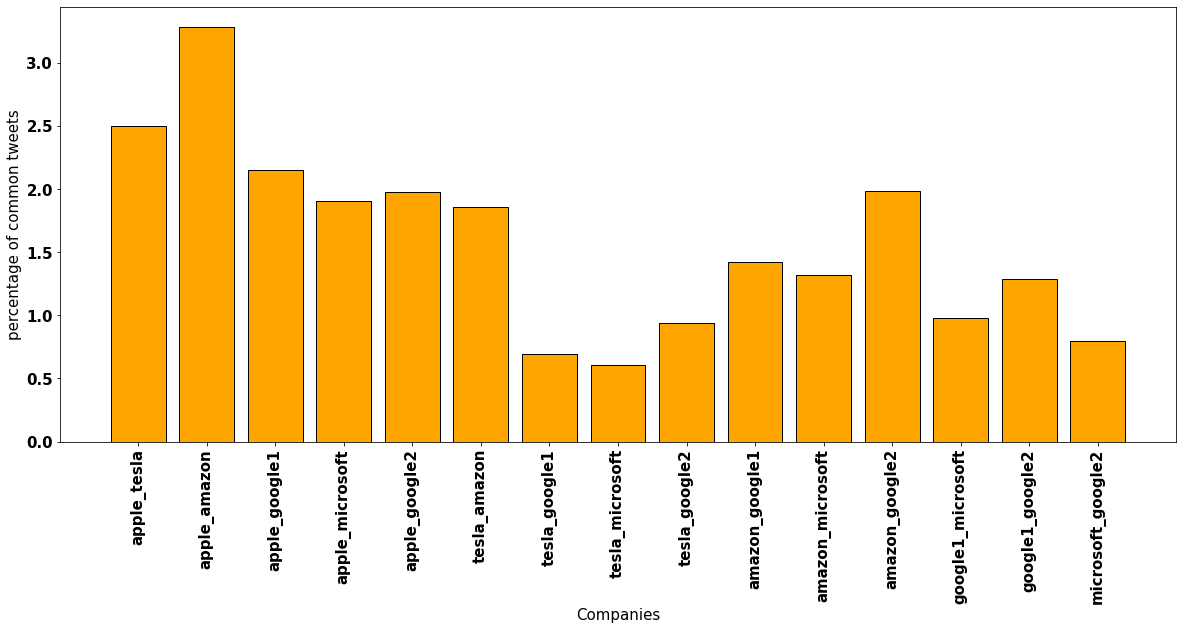

In [ ]:
# plotting the dataframe
fig = plt.figure(figsize=(20,8))
x = df_l['companies']
y = df_l['common_tweet_percentage']
plt.xticks(rotation=90)
plt.xlabel('Companies')
plt.ylabel('percentage of common tweets')
plt.bar(x,y,color='orange',edgecolor='black')

In [ ]:
# counting common company tweets
df_c = pd.DataFrame(company_tweet_id_ts['tweet_id'].value_counts())
df_c = df_c.reset_index()
df_c = df_c.rename(columns={"index":"tweet_id","tweet_id":"common_companies"})
print('tweet_id and number of companies associated with it:\n')
print(df_c)

tweet_id and number of companies associated with it:

                    tweet_id  common_companies
0        1144105326347726848                 6
1        1111206379891634176                 6
2        1180116495470333954                 6
3        1088331840400883714                 6
4        1187930888077791232                 6
...                      ...               ...
3717959  1047836746858332160                 1
3717960   832455611161796609                 1
3717961   832455570300887041                 1
3717962   579990075087294464                 1
3717963   877902875191635969                 1

[3717964 rows x 2 columns]


In [ ]:
# calculating percentages for common company tweets
df_c1 = df_c['common_companies'].value_counts()
df_c1 = df_c1.reset_index()
df_c1 = df_c1.rename(columns={"index":"common_company_number","common_companies":"common_companies_count"})
df_c1['common_companies_count'] = round(df_c1['common_companies_count']*100/total_tweet_count,5)
print('number of companies associated with a tweet and percentages of such tweets:\n')
print(df_c1)

number of companies associated with a tweet and percentages of such tweets:

   common_company_number  common_companies_count
0                      1                88.67388
1                      2                 7.45171
2                      3                 2.73106
3                      4                 0.86574
4                      5                 0.26412
5                      6                 0.01348


<BarContainer object of 6 artists>

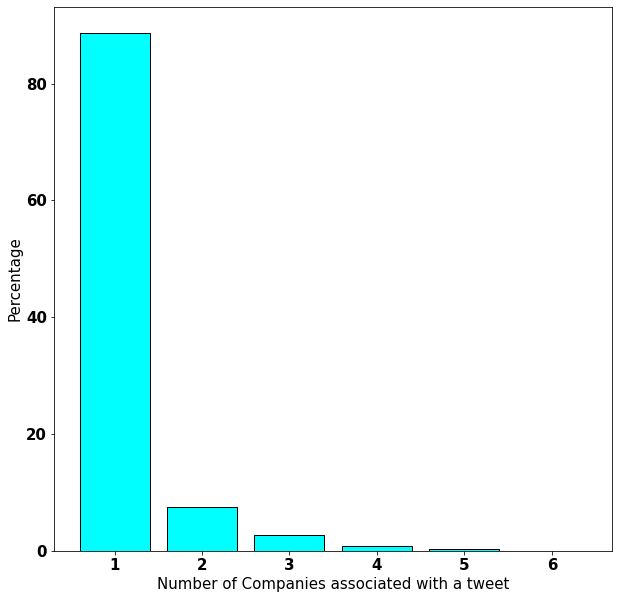

In [ ]:
# plotting the graph
fig = plt.figure(figsize=(10,10))
x = df_c1['common_company_number']
y = df_c1['common_companies_count']
plt.xlabel('Number of Companies associated with a tweet')
plt.ylabel('Percentage')
plt.bar(x,y,color='cyan',edgecolor='black')

## **Exploring writers, comment number, like number, retweet Number for each company**

In [ ]:
# importing the 'Tweet.csv' dataset that contains tweet details.
company_tweets = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tweet.csv')

# viewing the dataframe and general info
print('the dataframe:\n',company_tweets)
print('\ngeneral info:')
print('\ndataframe shape:\n',company_tweets.shape)
print(company_tweets.info())

the dataframe:
                     tweet_id           writer  ...  retweet_num like_num
0         550441509175443456  VisualStockRSRC  ...            0        1
1         550441672312512512      KeralaGuy77  ...            0        0
2         550441732014223360      DozenStocks  ...            0        0
3         550442977802207232     ShowDreamCar  ...            0        1
4         550443807834402816     i_Know_First  ...            0        1
...                      ...              ...  ...          ...      ...
3717959  1212159765914079234        TEEELAZER  ...            0        6
3717960  1212159838882533376    ShortingIsFun  ...            0        1
3717961  1212160015332728833      Commuternyc  ...            0        5
3717962  1212160410692046849      MoriaCrypto  ...            0        1
3717963  1212160477159206912         treabase  ...            0        0

[3717964 rows x 7 columns]

general info:

dataframe shape:
 (3717964, 7)
<class 'pandas.core.frame.DataFra

In [ ]:
# filtering 'compancompany_tweet_id_ts' dataframe and getting separate dataframe of each company for analysis
apple_tweet_id_df =company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='AAPL']
tesla_tweet_id_df =company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='TSLA']
amazon_tweet_id_df =company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='AMZN']
microsoft_tweet_id_df =company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='MSFT']
goog_tweet_id_df =company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='GOOG']
googl_tweet_id_df =company_tweet_id_ts[company_tweet_id_ts['ticker_symbol']=='GOOGL']

# viewing the head of each dataframe for verification
print('for apple:\n')
print(apple_tweet_id_df.head())

print('\nfor tesla:\n')
print(tesla_tweet_id_df.head())

print('\nfor amazon:\n')
print(amazon_tweet_id_df.head())

print('\nfor microsoft:\n')
print(microsoft_tweet_id_df.head())

print('\nfor Goog:\n')
print(goog_tweet_id_df.head())

print('\nfor Googl:\n')
print(googl_tweet_id_df.head())

for apple:

             tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL

for tesla:

                   tweet_id ticker_symbol
3239577  550442977802207232          TSLA
3239578  550443807834402816          TSLA
3239579  550443808606126081          TSLA
3239580  550443809700851716          TSLA
3239581  550443857142611968          TSLA

for amazon:

                   tweet_id ticker_symbol
2145151  550441732014223360          AMZN
2145152  550447850857828352          AMZN
2145153  550453172096217088          AMZN
2145154  550453624258965505          AMZN
2145155  550453897714995200          AMZN

for microsoft:

                   tweet_id ticker_symbol
2863866  550444112328261632          MSFT
2863867  550455355134578688          MSFT
2863868  550455384734183424          MSFT
2863869  550466945061908482          MSFT
2863870  55046

In [ ]:
# converting the 'tweet_id' column of filtered datasets to lists
apple_tweet_ids = list(apple_tweet_id_df['tweet_id'])
tesla_tweet_ids = list(tesla_tweet_id_df['tweet_id'])
amazon_tweet_ids = list(amazon_tweet_id_df['tweet_id'])
microsoft_tweet_ids = list(microsoft_tweet_id_df['tweet_id'])
goog_tweet_ids = list(goog_tweet_id_df['tweet_id'])
googl_tweet_ids = list(googl_tweet_id_df['tweet_id'])

In [ ]:
# filtering the dataset of tweet details using list of tweet_id associated with each company
# for apple
apple_tweets_df = company_tweets[company_tweets.tweet_id.isin(apple_tweet_ids)]

# resetting the index and removing the tweet_id column
apple_tweets_df = apple_tweets_df.reset_index(drop=True)
apple_tweets_df = apple_tweets_df.drop(columns=['tweet_id'])

# for tesla
tesla_tweets_df = company_tweets[company_tweets.tweet_id.isin(tesla_tweet_ids)]

# resetting the index and removing the tweet_id column
tesla_tweets_df = tesla_tweets_df.reset_index(drop=True)
tesla_tweets_df = tesla_tweets_df.drop(columns=['tweet_id'])

# for amazon
amazon_tweets_df = company_tweets[company_tweets.tweet_id.isin(amazon_tweet_ids)]

# resetting the index and removing the tweet_id column
amazon_tweets_df = amazon_tweets_df.reset_index(drop=True)
amazon_tweets_df = amazon_tweets_df.drop(columns=['tweet_id'])

# for microsoft
microsoft_tweets_df = company_tweets[company_tweets.tweet_id.isin(microsoft_tweet_ids)]

# resetting the index and removing the tweet_id column
microsoft_tweets_df = microsoft_tweets_df.reset_index(drop=True)
microsoft_tweets_df = microsoft_tweets_df.drop(columns=['tweet_id'])

# for goog
goog_tweets_df = company_tweets[company_tweets.tweet_id.isin(goog_tweet_ids)]

# resetting the index and removing the tweet_id column
goog_tweets_df = goog_tweets_df.reset_index(drop=True)
goog_tweets_df = goog_tweets_df.drop(columns=['tweet_id'])

# for googl
googl_tweets_df = company_tweets[company_tweets.tweet_id.isin(googl_tweet_ids)]

# resetting the index and removing the tweet_id column
googl_tweets_df = googl_tweets_df.reset_index(drop=True)
googl_tweets_df = googl_tweets_df.drop(columns=['tweet_id'])

In [ ]:
# exploring the different tweet writers for each company

# for apple
print('for apple:\n')
print(apple_tweets_df['writer'].value_counts())

# for tesla
print('\nfor tesla:\n')
print(tesla_tweets_df['writer'].value_counts())

# for amazon
print('\nfor amazon:\n')
print(amazon_tweets_df['writer'].value_counts())

# for microsoft
print('\nfor microsoft:\n')
print(microsoft_tweets_df['writer'].value_counts())

# for goog
print('\nfor Goog:\n')
print(goog_tweets_df['writer'].value_counts())

# for googl
print('\nfor Googl:\n')
print(googl_tweets_df['writer'].value_counts())

for apple:

_peripherals       91424
computer_hware     90899
MacHashNews        42190
PortfolioBuzz      38719
treabase           13828
                   ...  
TheBlakeGardner        1
dorian_pieracci        1
only1ryry              1
NLSoutherland          1
GrantSheppard7         1
Name: writer, Length: 89120, dtype: int64

for tesla:

markbspiegel       17954
PortfolioBuzz      16070
Commuternyc        13233
passthebeano       10695
ExactOptionPick     9702
                   ...  
MaxFilings             1
ManmmothTrader         1
sheuneuro              1
counter_hedge          1
BrettTheNerdy          1
Name: writer, Length: 46563, dtype: int64

for amazon:

retail_Dbt         44093
OACtrading         11366
davidmoadel         8628
TradingGuru         6981
LloydCreekStock     6123
                   ...  
MattFevola             1
aFanFromKY             1
Vima_Co                1
hackyourcash           1
dasanil                1
Name: writer, Length: 42512, dtype: int64

for micro

In [ ]:
#  exploring comment number distribution

# for apple
print('for apple:\n')
print(apple_tweets_df['comment_num'].value_counts())

# for tesla
print('\nfor tesla:\n')
print(tesla_tweets_df['comment_num'].value_counts())

# for amazon
print('\nfor amazon:\n')
print(amazon_tweets_df['comment_num'].value_counts())

# for microsoft
print('\nfor microsoft:\n')
print(microsoft_tweets_df['comment_num'].value_counts())

# for goog
print('\nfor Goog:\n')
print(goog_tweets_df['comment_num'].value_counts())

# for googl
print('\nfor Googl:\n')
print(googl_tweets_df['comment_num'].value_counts())

for apple:

0      1300563
1        91006
2        18386
3         6267
4         2778
        ...   
79           1
77           1
76           1
286          1
348          1
Name: comment_num, Length: 93, dtype: int64

for tesla:

0      790298
1      184255
2       55952
3       22694
4       12120
        ...  
154         1
157         1
160         1
163         1
631         1
Name: comment_num, Length: 177, dtype: int64

for amazon:

0      635091
1       59538
2       13162
3        4635
4        2051
        ...  
87          1
86          1
69          1
43          1
496         1
Name: comment_num, Length: 80, dtype: int64

for microsoft:

0      350476
1       18845
2        3646
3        1224
4         540
5         298
6         178
7          93
8          80
9          62
10         32
11         31
13         30
14         25
12         23
15         16
18         12
17         11
16          9
19          9
22          6
24          5
23          5
25          5
26

In [ ]:
#  exploring like number distribution

# for apple
print('for apple:\n')
print(apple_tweets_df['like_num'].value_counts())

# for tesla
print('\nfor tesla:\n')
print(tesla_tweets_df['like_num'].value_counts())

# for amazon
print('\nfor amazon:\n')
print(amazon_tweets_df['like_num'].value_counts())

# for microsoft
print('\nfor microsoft:\n')
print(microsoft_tweets_df['like_num'].value_counts())

# for goog
print('\nfor Goog:\n')
print(goog_tweets_df['like_num'].value_counts())

# for googl
print('\nfor Googl:\n')
print(googl_tweets_df['like_num'].value_counts())

for apple:

0      1047579
1       213141
2        65592
3        30152
4        16235
        ...   
325          1
327          1
207          1
333          1
924          1
Name: like_num, Length: 402, dtype: int64

for tesla:

0      504168
1      207989
2       99294
3       57129
4       36484
        ...  
658         1
661         1
663         1
667         1
999         1
Name: like_num, Length: 760, dtype: int64

for amazon:

0      495015
1      112593
2       40077
3       19579
4       11214
        ...  
614         1
243         1
754         1
616         1
506         1
Name: like_num, Length: 372, dtype: int64

for microsoft:

0      289140
1       45910
2       15286
3        7337
4        4158
        ...  
142         1
586         1
140         1
139         1
510         1
Name: like_num, Length: 255, dtype: int64

for Goog:

0      321079
1       42201
2       12631
3        5509
4        2805
        ...  
142         1
143         1
146         1
147        

In [ ]:
#  exploring retweet number distribution

# for apple
print('for apple:\n')
print(apple_tweets_df['retweet_num'].value_counts())

# for tesla
print('\nfor tesla:\n')
print(tesla_tweets_df['retweet_num'].value_counts())

# for amazon
print('\nfor amazon:\n')
print(amazon_tweets_df['retweet_num'].value_counts())

# for microsoft
print('\nfor microsoft:\n')
print(microsoft_tweets_df['retweet_num'].value_counts())

# for goog
print('\nfor Goog:\n')
print(goog_tweets_df['retweet_num'].value_counts())

# for googl
print('\nfor Googl:\n')
print(googl_tweets_df['retweet_num'].value_counts())

for apple:

0      1203481
1       139840
2        36340
3        14776
4         7811
        ...   
294          1
296          1
298          1
299          1
175          1
Name: retweet_num, Length: 340, dtype: int64

for tesla:

0      846372
1      128036
2       42206
3       20997
4       12386
        ...  
297         1
299         1
302         1
303         1
174         1
Name: retweet_num, Length: 345, dtype: int64

for amazon:

0      597824
1       70682
2       21005
3        9092
4        5061
        ...  
193         1
191         1
81          1
185         1
509         1
Name: retweet_num, Length: 259, dtype: int64

for microsoft:

0      320175
1       33352
2        9322
3        4055
4        2244
        ...  
119         1
118         1
885         1
117         1
340         1
Name: retweet_num, Length: 211, dtype: int64

for Goog:

0      342826
1       31935
2        8649
3        3195
4        1495
        ...  
144         1
145         1
402         1

## **Exploring Stock Data**

In [ ]:
# importing the stock market data for all the companies
company_stock_data = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/CompanyValues.csv')
company_stock_data['day_date'] = pd.to_datetime(company_stock_data['day_date'])

# viewing the dataframe and general info
print('the dataframe:\n',company_stock_data)
print('\ngeneral info:')
print('\ndataframe shape:\n',company_stock_data.shape)
print(company_stock_data.info())

the dataframe:
       ticker_symbol   day_date  close_value  ...  open_value  high_value  low_value
0              AAPL 2020-05-29       317.94  ...      319.25      321.15   316.4700
1              AAPL 2020-05-28       318.25  ...      316.77      323.44   315.6300
2              AAPL 2020-05-27       318.11  ...      316.14      318.71   313.0900
3              AAPL 2020-05-26       316.73  ...      323.50      324.24   316.5000
4              AAPL 2020-05-22       318.89  ...      315.77      319.23   315.3500
...             ...        ...          ...  ...         ...         ...        ...
17523          TSLA 2019-12-21       405.59  ...      410.29      413.00   400.1850
17524          TSLA 2019-12-22       405.59  ...      410.29      413.00   400.1850
17525          TSLA 2019-12-25       425.25  ...      418.36      425.47   412.6875
17526          TSLA 2019-12-28       430.38  ...      435.00      435.31   426.1100
17527          TSLA 2019-12-29       430.38  ...      435.00

In [ ]:
# getting separate stock market dataframes for each company

# for apple
apple_sm = company_stock_data[company_stock_data['ticker_symbol']=='AAPL']
# sorting the data and reseting the index
apple_sm = apple_sm.sort_values(by='day_date')
apple_sm.reset_index(drop=True,inplace=True)
print('for apple:\n')
print(apple_sm.head())

# for tesla
tesla_sm = company_stock_data[company_stock_data['ticker_symbol']=='TSLA']
# sorting the data and reseting the index
tesla_sm = tesla_sm.sort_values(by='day_date')
tesla_sm.reset_index(drop=True,inplace=True)
print('\nfor tesla:\n')
print(tesla_sm.head())

# for amazon
amazon_sm = company_stock_data[company_stock_data['ticker_symbol']=='AMZN']
# sorting the data and reseting the index
amazon_sm = amazon_sm.sort_values(by='day_date')
amazon_sm.reset_index(drop=True,inplace=True)
print('\nfor amazon:\n')
print(amazon_sm.head())

# for microsoft
microsoft_sm = company_stock_data[company_stock_data['ticker_symbol']=='MSFT']
# sorting the data and reseting the index
microsoft_sm = microsoft_sm.sort_values(by='day_date')
microsoft_sm.reset_index(drop=True,inplace=True)
print('\nfor microsoft:\n')
print(microsoft_sm.head())

# for goog
goog_sm = company_stock_data[company_stock_data['ticker_symbol']=='GOOG']
# sorting the data and reseting the index
goog_sm = goog_sm.sort_values(by='day_date')
goog_sm.reset_index(drop=True,inplace=True)
print('\nfor goog:\n')
print(goog_sm.head())

# for googl
googl_sm = company_stock_data[company_stock_data['ticker_symbol']=='GOOGL']
# sorting the data and reseting the index
googl_sm = googl_sm.sort_values(by='day_date')
googl_sm.reset_index(drop=True,inplace=True)
print('\nfor googl:\n')
print(googl_sm.head())

for apple:

  ticker_symbol   day_date  close_value  ...  open_value  high_value  low_value
0          AAPL 2010-06-01      37.2614  ...     37.0986     37.9914    36.9943
1          AAPL 2010-06-02      37.7071  ...     37.7914     37.8286    37.1907
2          AAPL 2010-06-03      37.5886  ...     37.8828     37.9357    37.2014
3          AAPL 2010-06-04      36.5664  ...     36.8871     37.4143    36.3757
4          AAPL 2010-06-07      35.8486  ...     36.8986     37.0214    35.7928

[5 rows x 7 columns]

for tesla:

  ticker_symbol   day_date  close_value  ...  open_value  high_value  low_value
0          TSLA 2010-06-29        23.89  ...       19.00     25.0000      17.54
1          TSLA 2010-06-30        23.83  ...       25.79     30.4192      23.30
2          TSLA 2010-07-01        21.96  ...       25.00     25.9200      20.27
3          TSLA 2010-07-02        19.20  ...       23.00     23.1000      18.71
4          TSLA 2010-07-06        16.11  ...       20.00     20.0000     

####**Apple Stocks Data Plot**

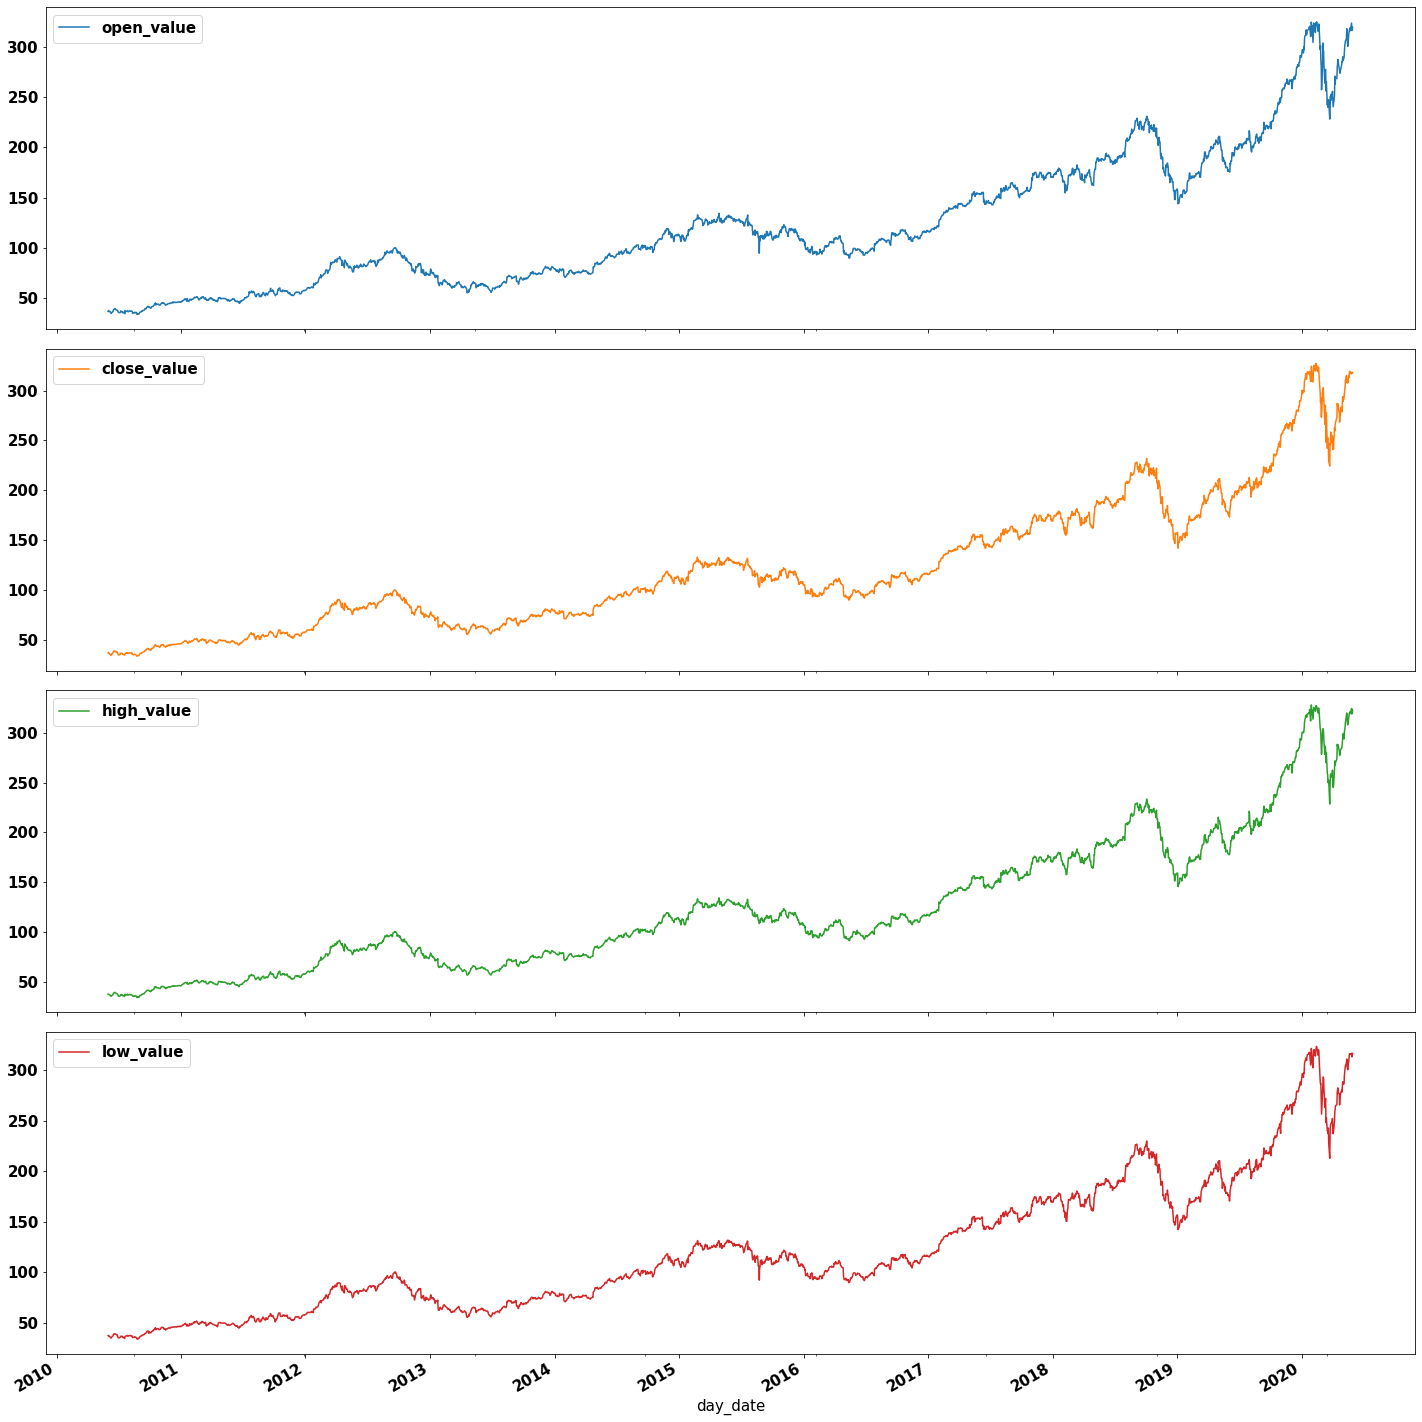

In [ ]:
apple_sm[['day_date','open_value','close_value','high_value','low_value']].plot(subplots=True,figsize=(20,20),x='day_date')

plt.tight_layout()
plt.show()

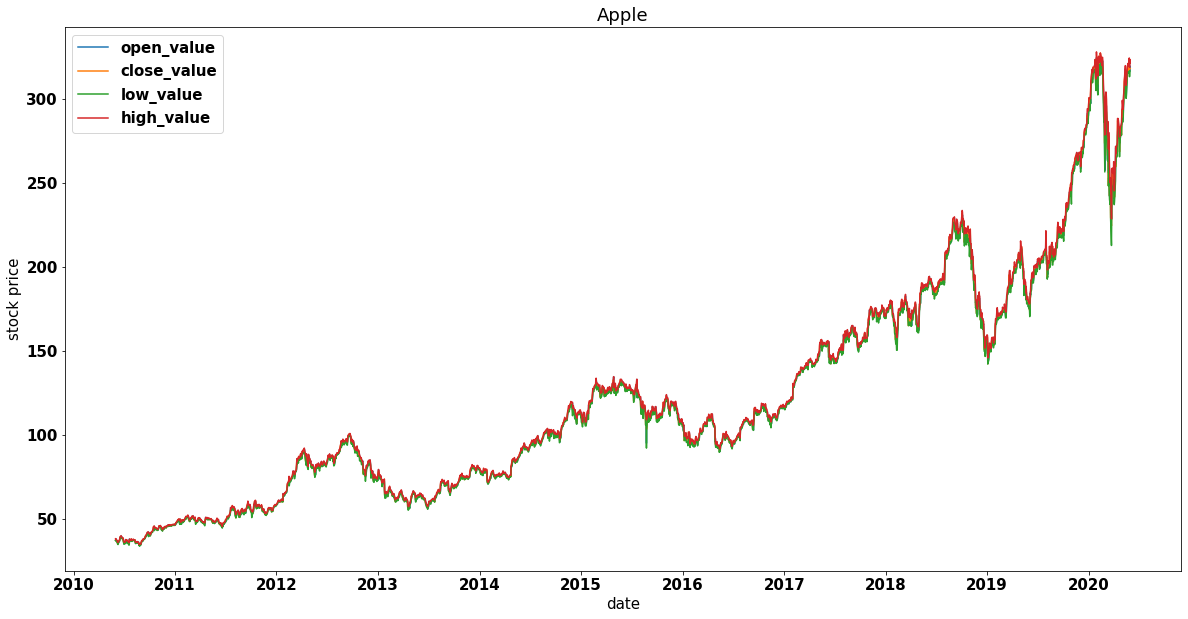

In [ ]:
fig,ax_apple_ov = plt.subplots(figsize=(20,10))

ax_apple_ov.plot(apple_sm['day_date'],apple_sm['open_value'],label='open_value')
ax_apple_ov.plot(apple_sm['day_date'],apple_sm['close_value'],label='close_value')
ax_apple_ov.plot(apple_sm['day_date'],apple_sm['low_value'],label='low_value')
ax_apple_ov.plot(apple_sm['day_date'],apple_sm['high_value'],label='high_value')
ax_apple_ov.set_xlabel('date')
ax_apple_ov.set_ylabel('stock price')
ax_apple_ov.set_title('Apple')
ax_apple_ov.legend()

####**Tesla Stocks Data Plot**

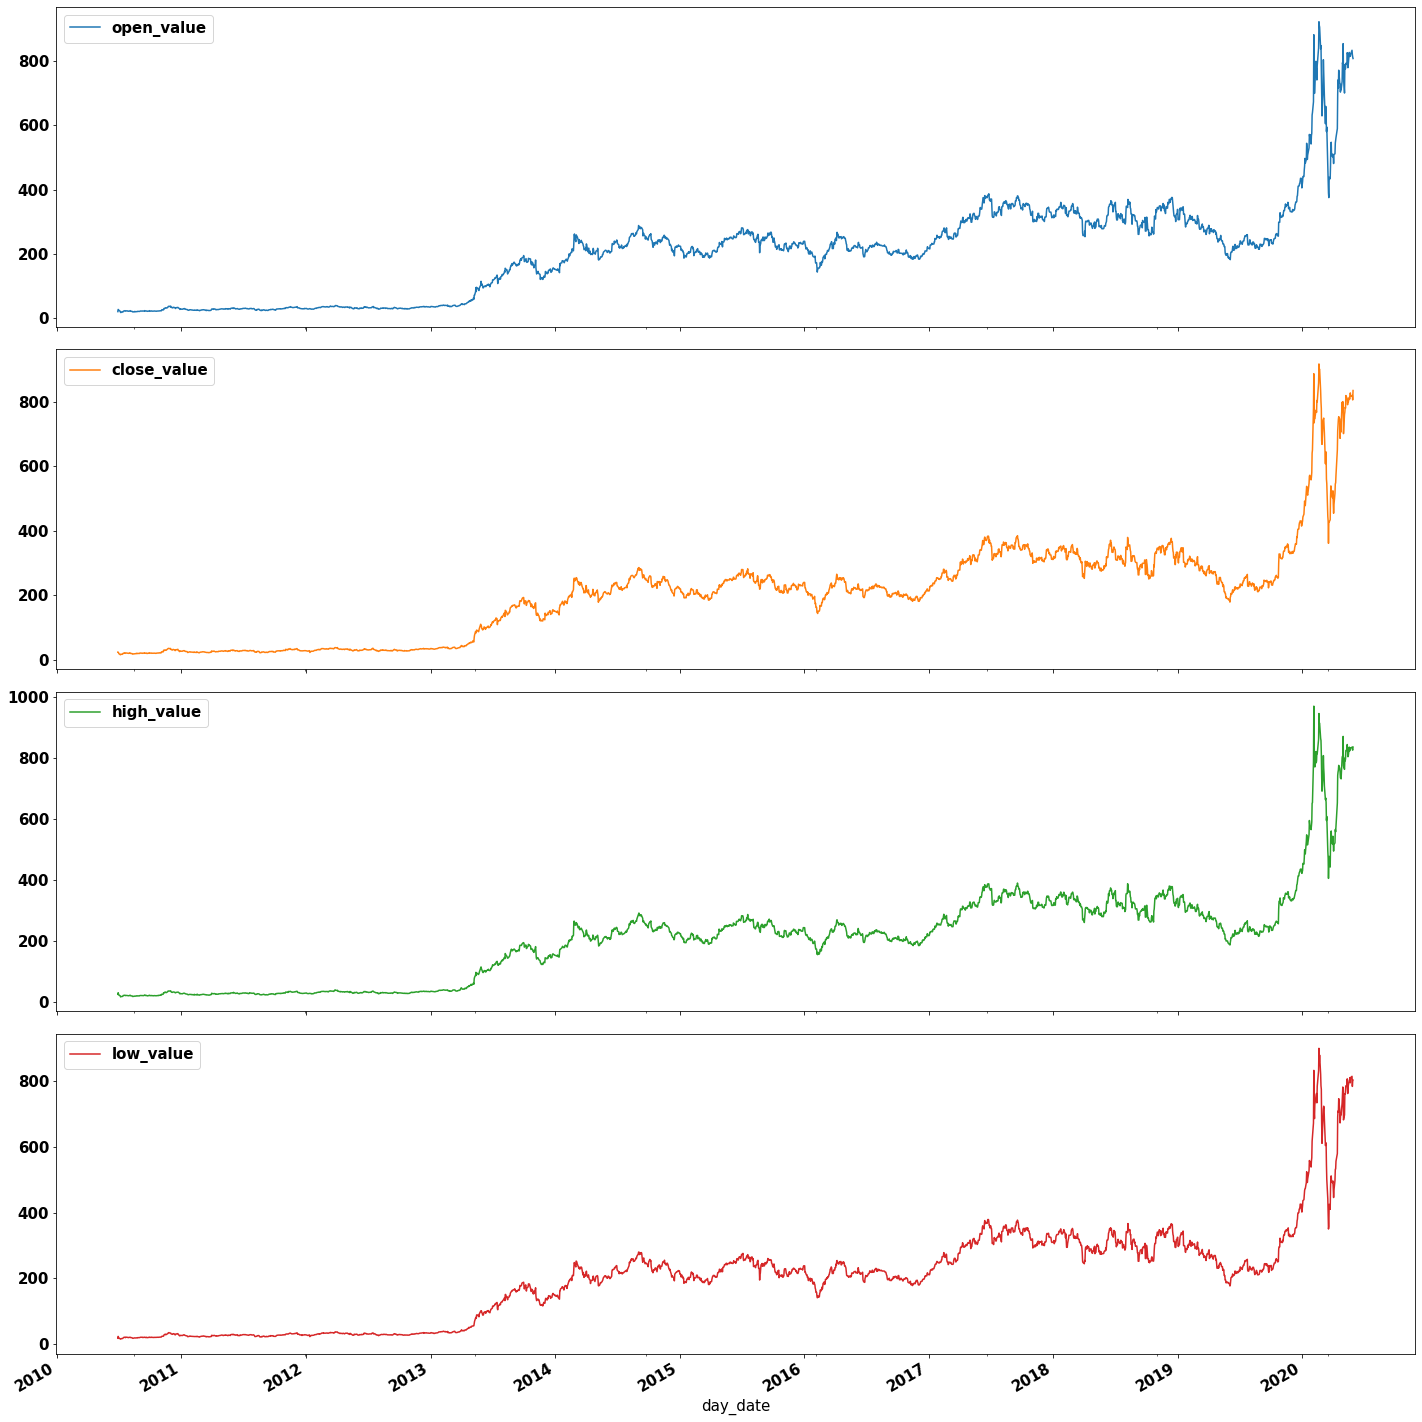

In [ ]:
tesla_sm[['day_date','open_value','close_value','high_value','low_value']].plot(subplots=True,figsize=(20,20),x='day_date')

plt.tight_layout()
plt.show()

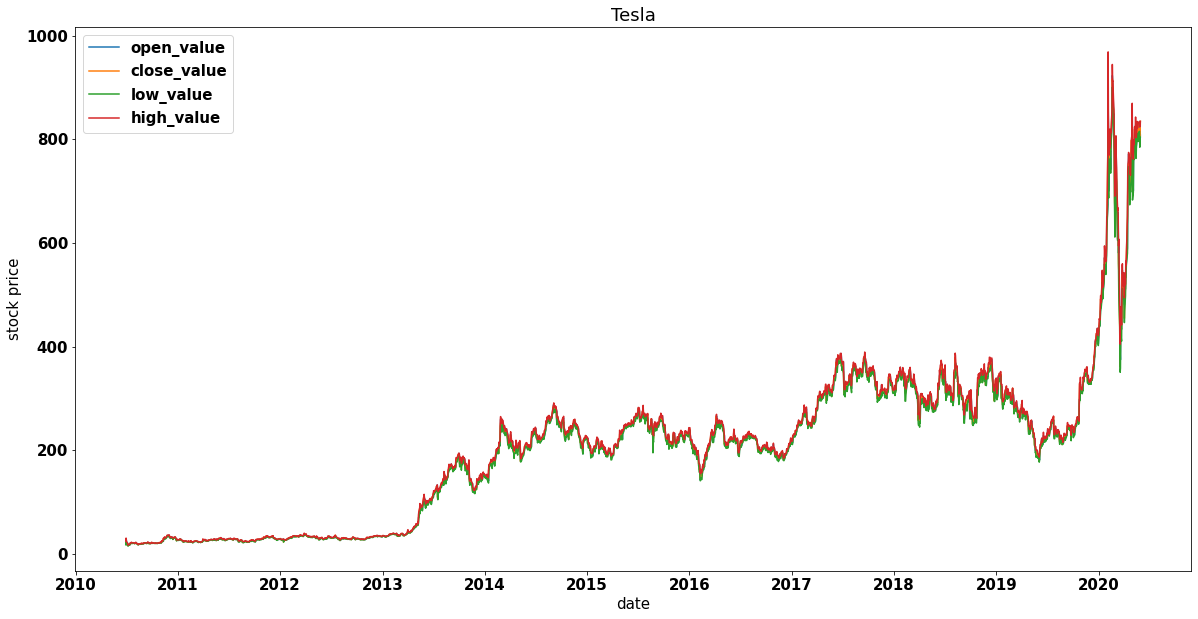

In [ ]:
fig,ax_tesla_ov = plt.subplots(figsize=(20,10))

ax_tesla_ov.plot(tesla_sm['day_date'],tesla_sm['open_value'],label='open_value')
ax_tesla_ov.plot(tesla_sm['day_date'],tesla_sm['close_value'],label='close_value')
ax_tesla_ov.plot(tesla_sm['day_date'],tesla_sm['low_value'],label='low_value')
ax_tesla_ov.plot(tesla_sm['day_date'],tesla_sm['high_value'],label='high_value')
ax_tesla_ov.set_xlabel('date')
ax_tesla_ov.set_ylabel('stock price')
ax_tesla_ov.set_title('Tesla')
ax_tesla_ov.legend()

####**Amazon Stocks Data Plot**

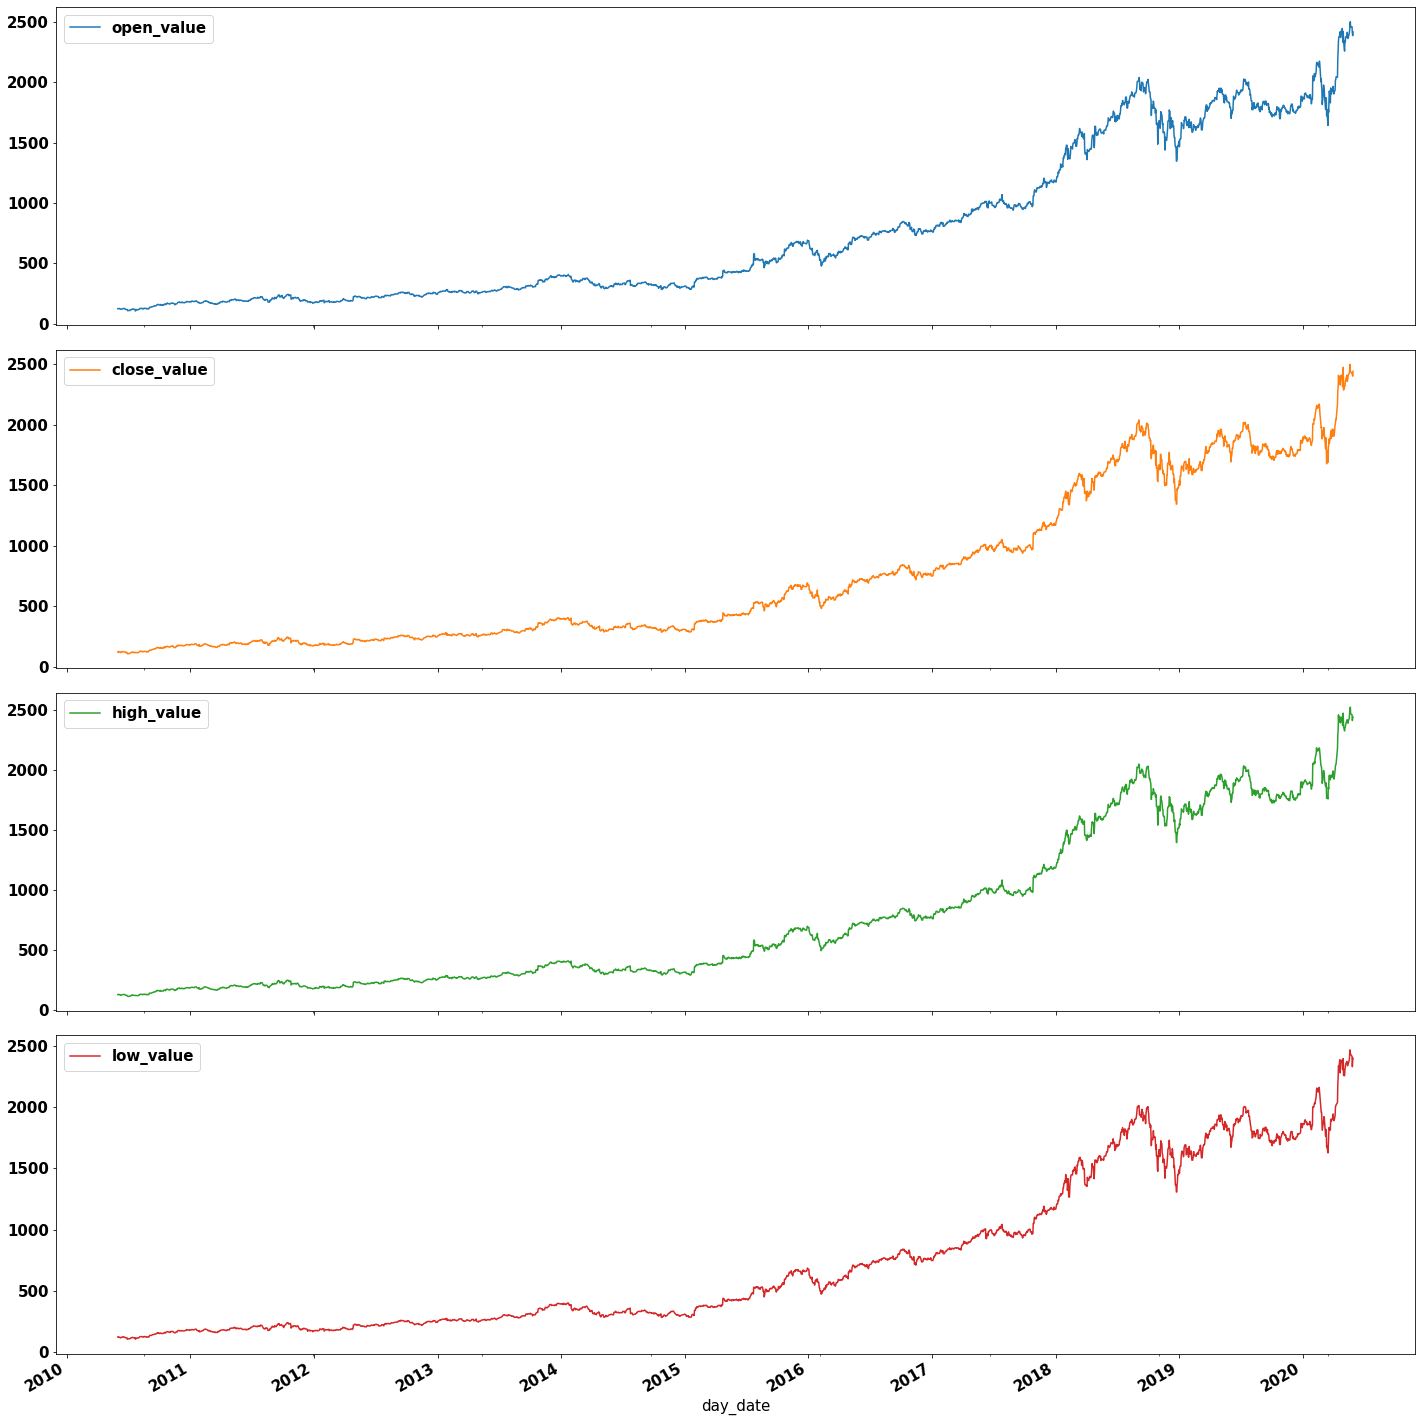

In [ ]:
amazon_sm[['day_date','open_value','close_value','high_value','low_value']].plot(subplots=True,figsize=(20,20),x='day_date')

plt.tight_layout()
plt.show()

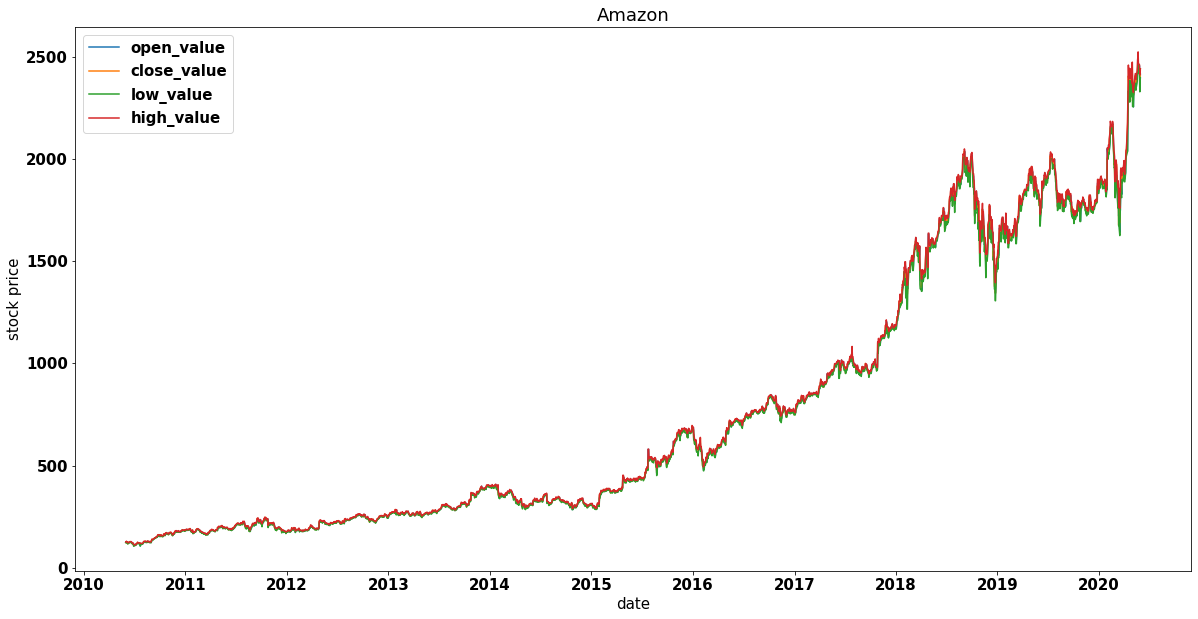

In [ ]:
fig,ax_amazon_ov = plt.subplots(figsize=(20,10))

ax_amazon_ov.plot(amazon_sm['day_date'],amazon_sm['open_value'],label='open_value')
ax_amazon_ov.plot(amazon_sm['day_date'],amazon_sm['close_value'],label='close_value')
ax_amazon_ov.plot(amazon_sm['day_date'],amazon_sm['low_value'],label='low_value')
ax_amazon_ov.plot(amazon_sm['day_date'],amazon_sm['high_value'],label='high_value')
ax_amazon_ov.set_xlabel('date')
ax_amazon_ov.set_ylabel('stock price')
ax_amazon_ov.set_title('Amazon')
ax_amazon_ov.legend()

####**Microsoft Stocks Data Plot**

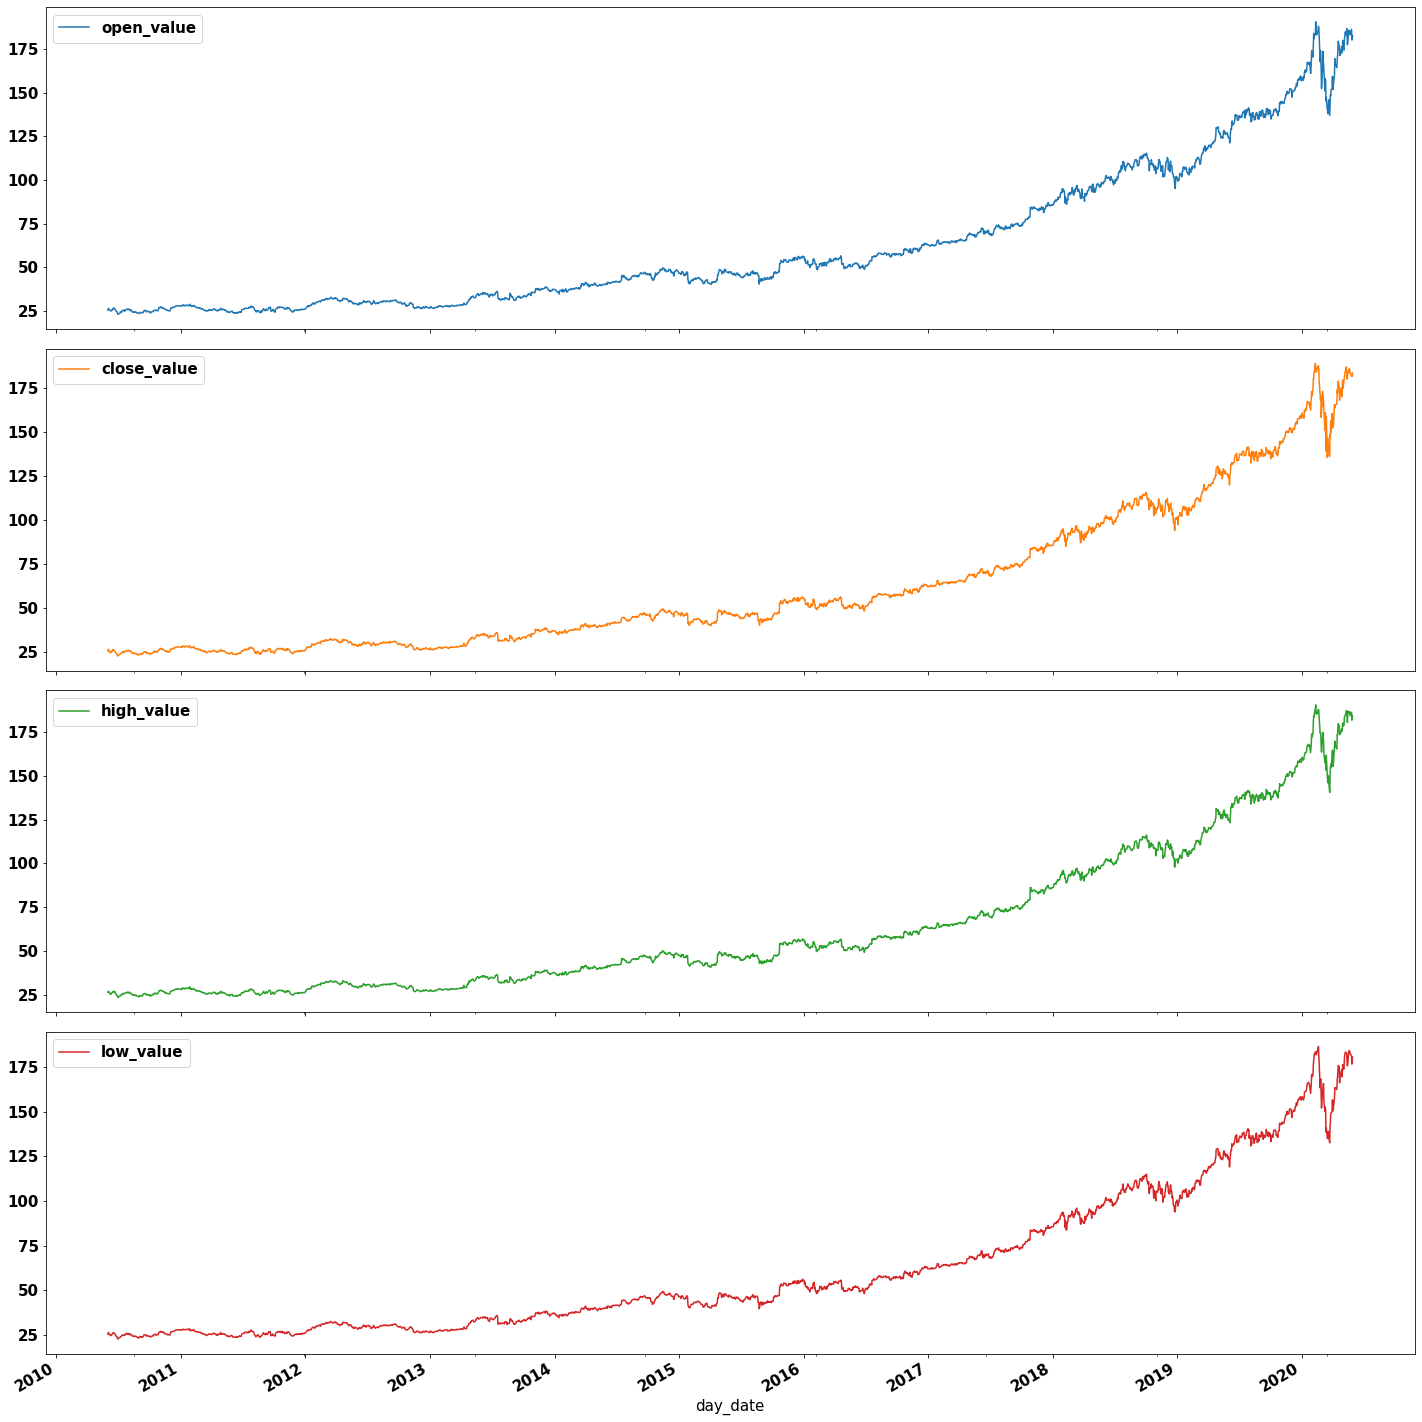

In [ ]:
microsoft_sm[['day_date','open_value','close_value','high_value','low_value']].plot(subplots=True,figsize=(20,20),x='day_date')

plt.tight_layout()
plt.show()

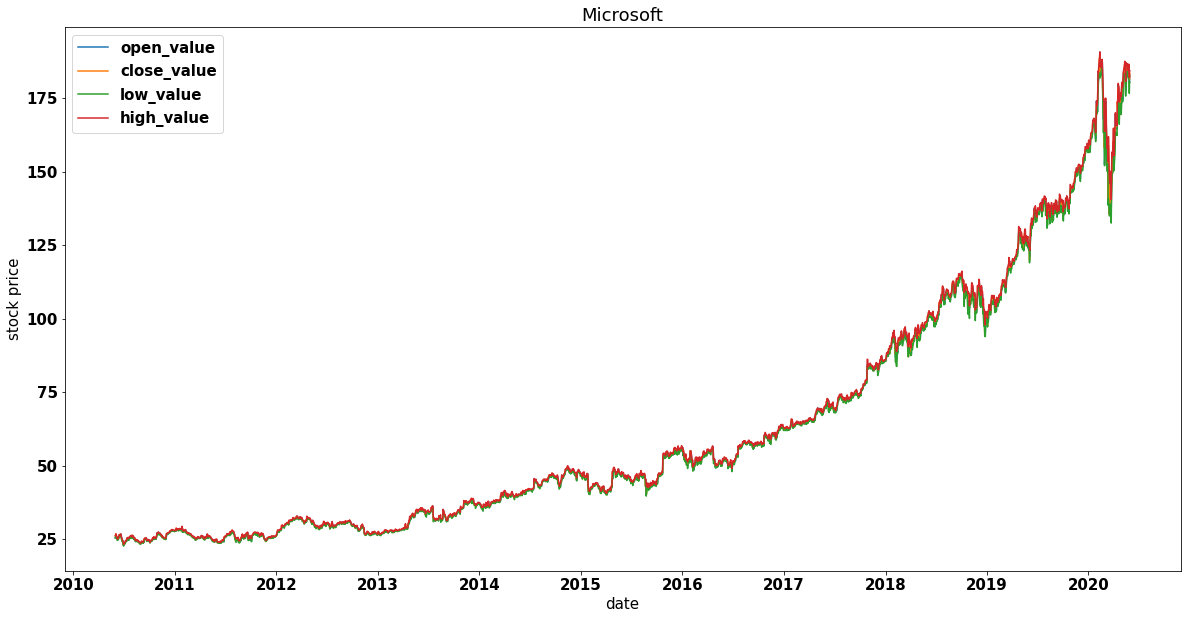

In [ ]:
fig,ax_microsoft_ov = plt.subplots(figsize=(20,10))

ax_microsoft_ov.plot(microsoft_sm['day_date'],microsoft_sm['open_value'],label='open_value')
ax_microsoft_ov.plot(microsoft_sm['day_date'],microsoft_sm['close_value'],label='close_value')
ax_microsoft_ov.plot(microsoft_sm['day_date'],microsoft_sm['low_value'],label='low_value')
ax_microsoft_ov.plot(microsoft_sm['day_date'],microsoft_sm['high_value'],label='high_value')
ax_microsoft_ov.set_xlabel('date')
ax_microsoft_ov.set_ylabel('stock price')
ax_microsoft_ov.set_title('Microsoft')
ax_microsoft_ov.legend()

####**Goog Stocks Data Plot**

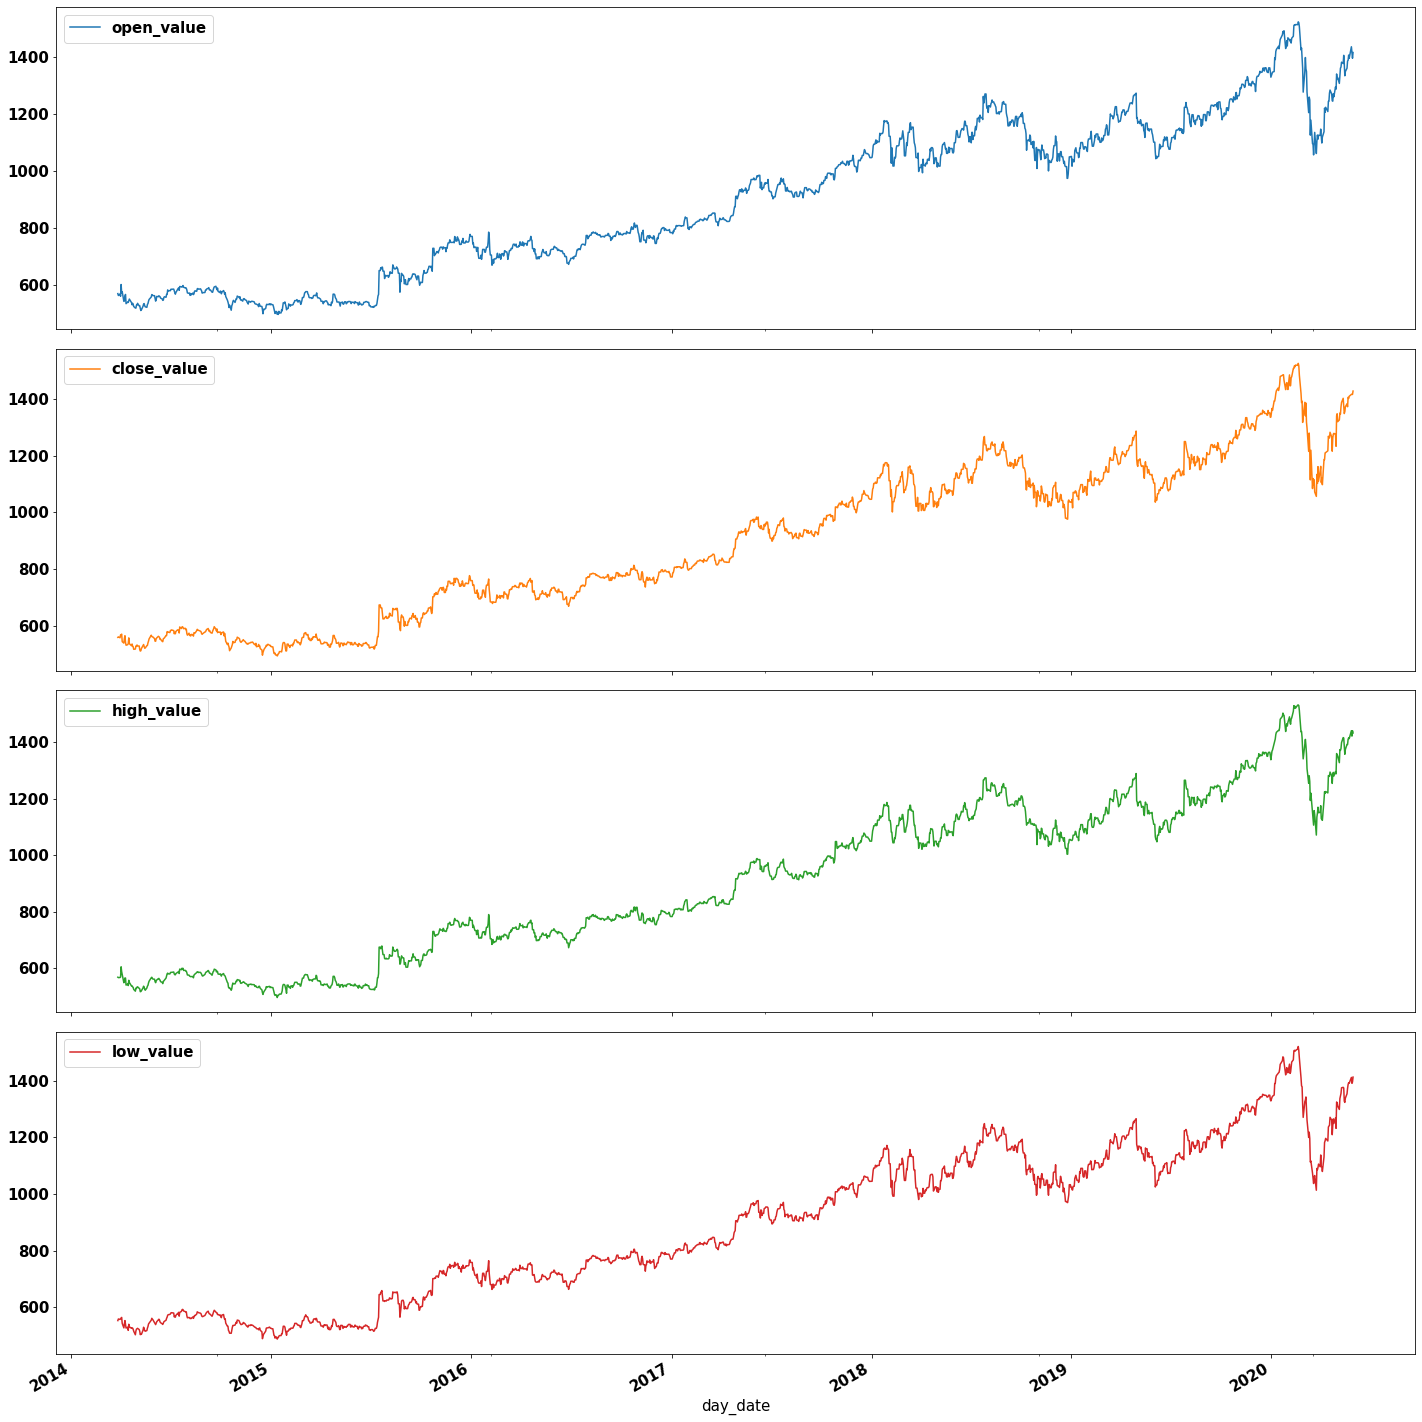

In [ ]:
goog_sm[['day_date','open_value','close_value','high_value','low_value']].plot(subplots=True,figsize=(20,20),x='day_date')

plt.tight_layout()
plt.show()

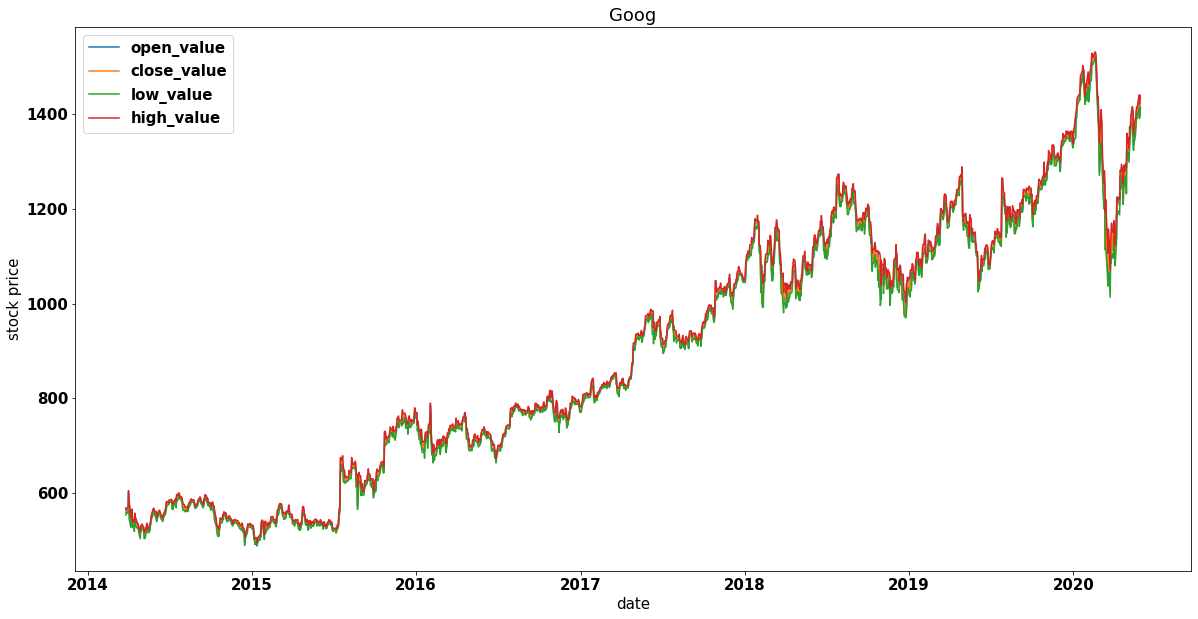

In [ ]:
fig,ax_goog_ov = plt.subplots(figsize=(20,10))

ax_goog_ov.plot(goog_sm['day_date'],goog_sm['open_value'],label='open_value')
ax_goog_ov.plot(goog_sm['day_date'],goog_sm['close_value'],label='close_value')
ax_goog_ov.plot(goog_sm['day_date'],goog_sm['low_value'],label='low_value')
ax_goog_ov.plot(goog_sm['day_date'],goog_sm['high_value'],label='high_value')
ax_goog_ov.set_xlabel('date')
ax_goog_ov.set_ylabel('stock price')
ax_goog_ov.set_title('Goog')
ax_goog_ov.legend()

####**Googl Stocks Data Plot**

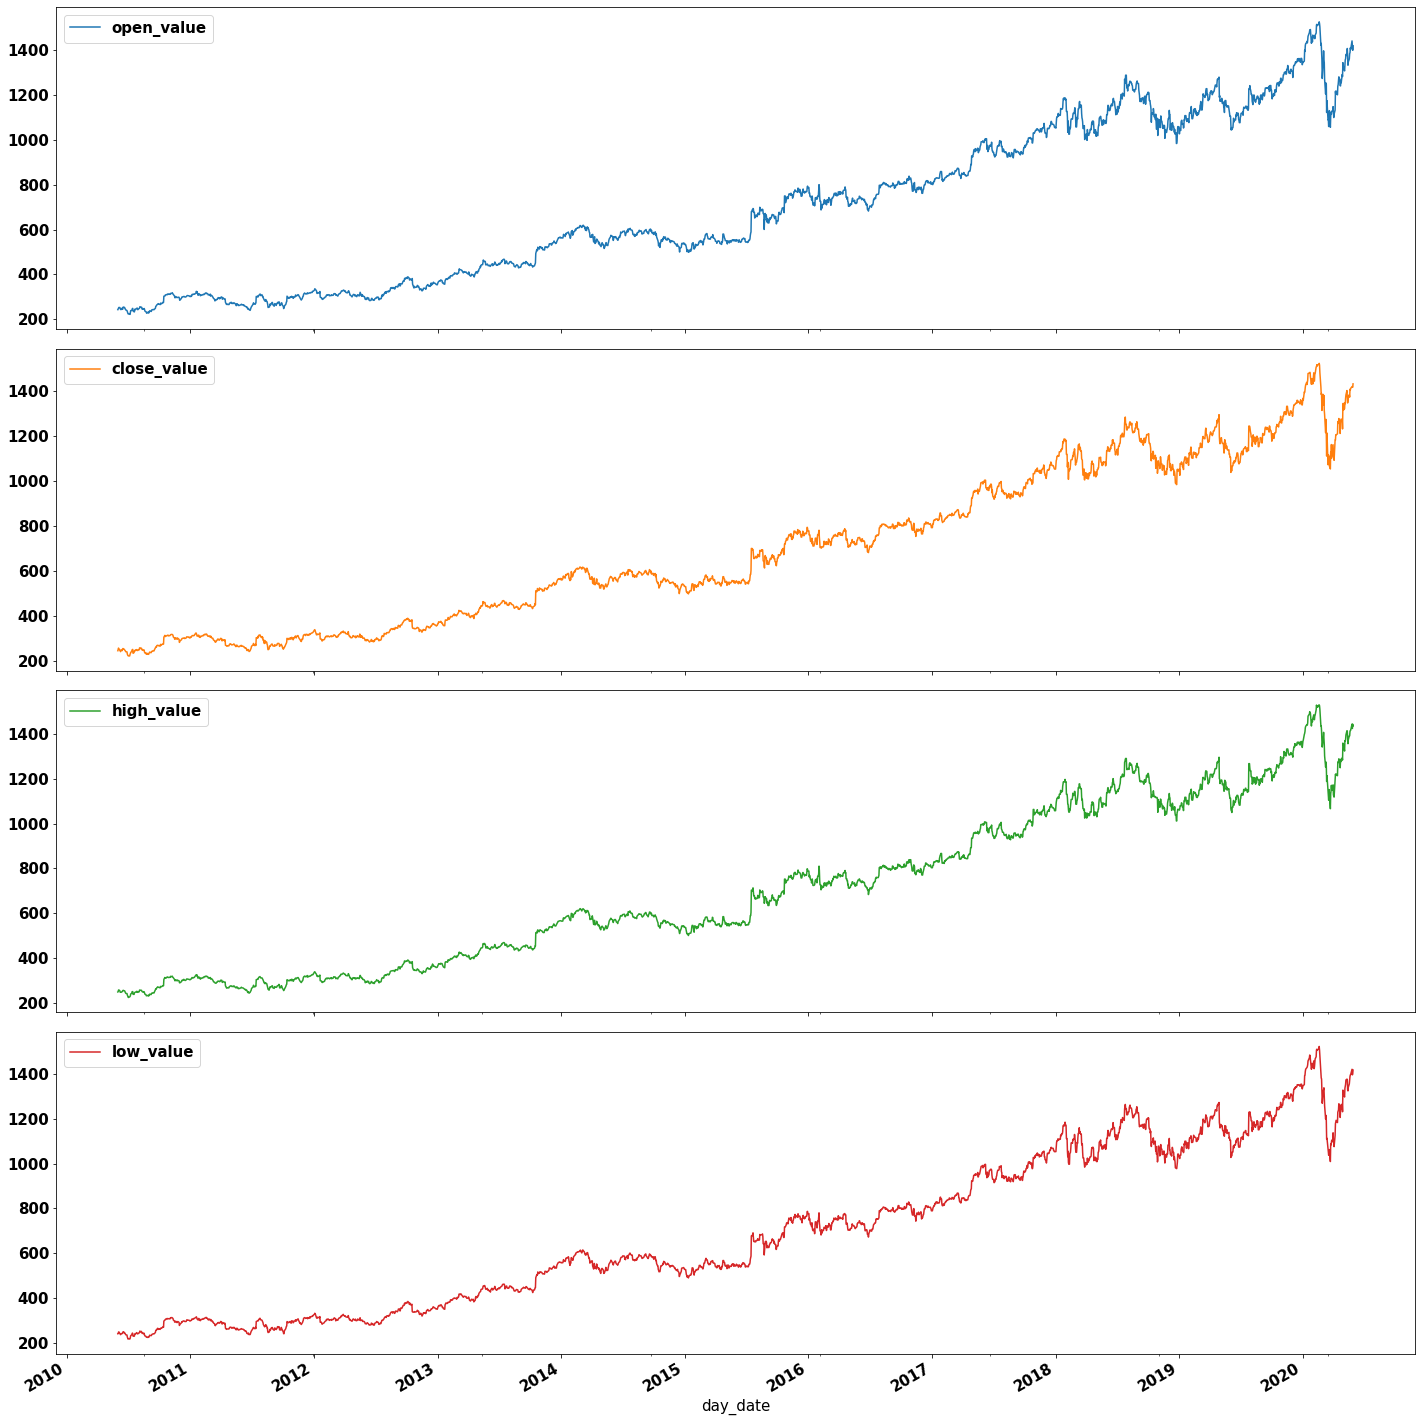

In [ ]:
googl_sm[['day_date','open_value','close_value','high_value','low_value']].plot(subplots=True,figsize=(20,20),x='day_date')

plt.tight_layout()
plt.show()

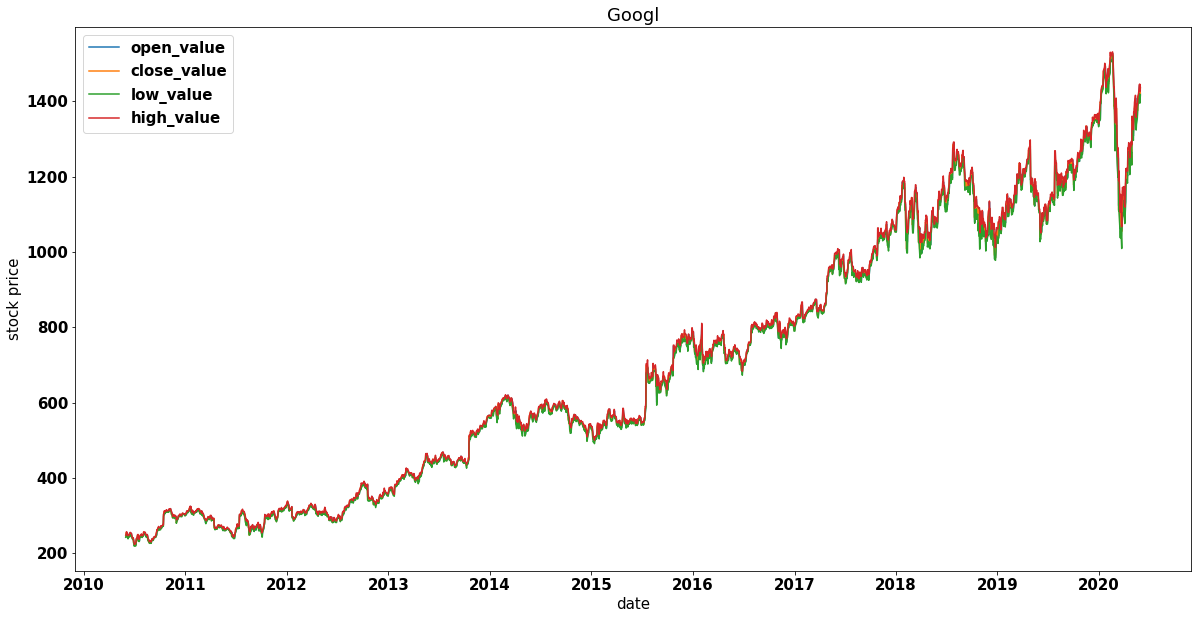

In [ ]:
fig,ax_googl_ov = plt.subplots(figsize=(20,10))

ax_googl_ov.plot(googl_sm['day_date'],googl_sm['open_value'],label='open_value')
ax_googl_ov.plot(googl_sm['day_date'],googl_sm['close_value'],label='close_value')
ax_googl_ov.plot(googl_sm['day_date'],googl_sm['low_value'],label='low_value')
ax_googl_ov.plot(googl_sm['day_date'],googl_sm['high_value'],label='high_value')
ax_googl_ov.set_xlabel('date')
ax_googl_ov.set_ylabel('stock price')
ax_googl_ov.set_title('Googl')
ax_googl_ov.legend()

### **Open Value Plot of All Companies**

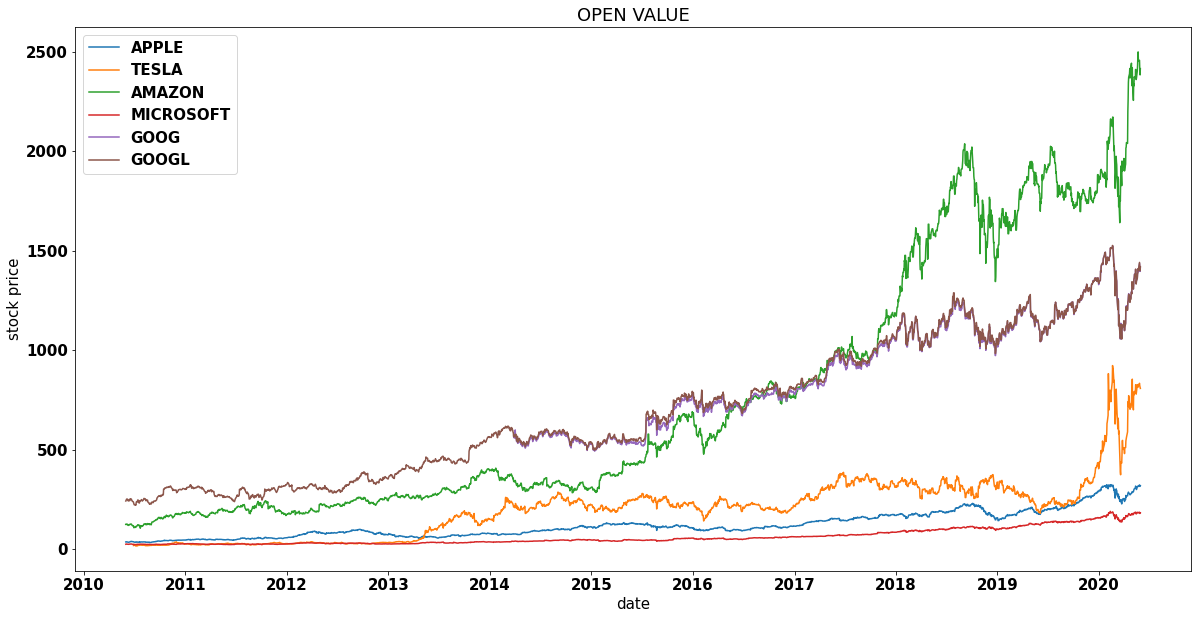

In [ ]:
fig,ax_ov = plt.subplots(figsize=(20,10))

ax_ov.plot(apple_sm['day_date'],apple_sm['open_value'],label='APPLE')
ax_ov.plot(tesla_sm['day_date'],tesla_sm['open_value'],label='TESLA')
ax_ov.plot(amazon_sm['day_date'],amazon_sm['open_value'],label='AMAZON')
ax_ov.plot(microsoft_sm['day_date'],microsoft_sm['open_value'],label='MICROSOFT')
ax_ov.plot(goog_sm['day_date'],goog_sm['open_value'],label='GOOG')
ax_ov.plot(googl_sm['day_date'],googl_sm['open_value'],label='GOOGL')
ax_ov.set_xlabel('date')
ax_ov.set_ylabel('stock price')
ax_ov.set_title('OPEN VALUE')
ax_ov.legend()

### **Close Value Plot of All Companies**

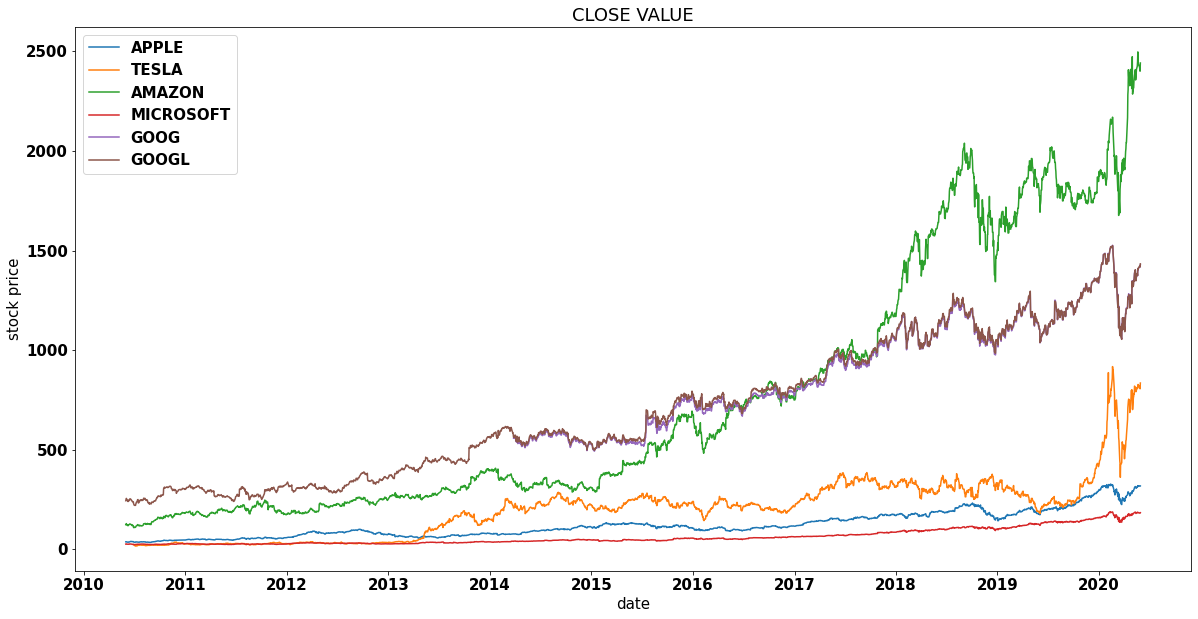

In [ ]:
fig,ax_cv = plt.subplots(figsize=(20,10))

ax_cv.plot(apple_sm['day_date'],apple_sm['close_value'],label='APPLE')
ax_cv.plot(tesla_sm['day_date'],tesla_sm['close_value'],label='TESLA')
ax_cv.plot(amazon_sm['day_date'],amazon_sm['close_value'],label='AMAZON')
ax_cv.plot(microsoft_sm['day_date'],microsoft_sm['close_value'],label='MICROSOFT')
ax_cv.plot(goog_sm['day_date'],goog_sm['close_value'],label='GOOG')
ax_cv.plot(googl_sm['day_date'],googl_sm['close_value'],label='GOOGL')
ax_cv.set_xlabel('date')
ax_cv.set_ylabel('stock price')
ax_cv.set_title('CLOSE VALUE')
ax_cv.legend()

### **Low Value Plot of All Companies**

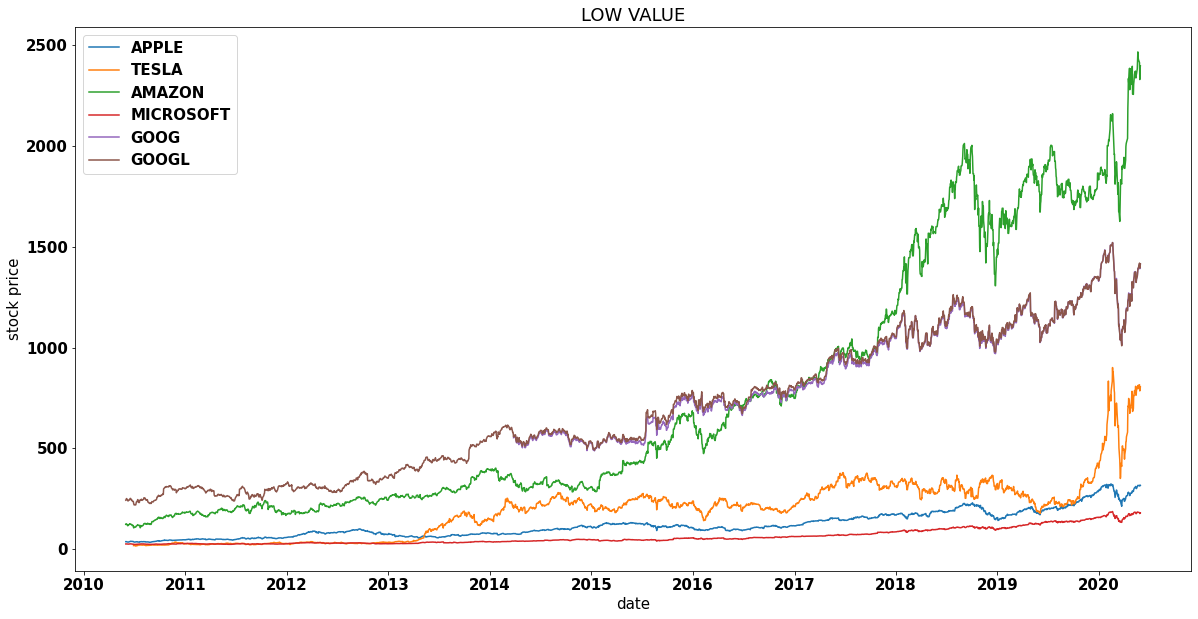

In [ ]:
fig,ax_lv = plt.subplots(figsize=(20,10))

ax_lv.plot(apple_sm['day_date'],apple_sm['low_value'],label='APPLE')
ax_lv.plot(tesla_sm['day_date'],tesla_sm['low_value'],label='TESLA')
ax_lv.plot(amazon_sm['day_date'],amazon_sm['low_value'],label='AMAZON')
ax_lv.plot(microsoft_sm['day_date'],microsoft_sm['low_value'],label='MICROSOFT')
ax_lv.plot(goog_sm['day_date'],goog_sm['low_value'],label='GOOG')
ax_lv.plot(googl_sm['day_date'],googl_sm['low_value'],label='GOOGL')
ax_lv.set_xlabel('date')
ax_lv.set_ylabel('stock price')
ax_lv.set_title('LOW VALUE')
ax_lv.legend()

### **High Value Plot of All Companies**

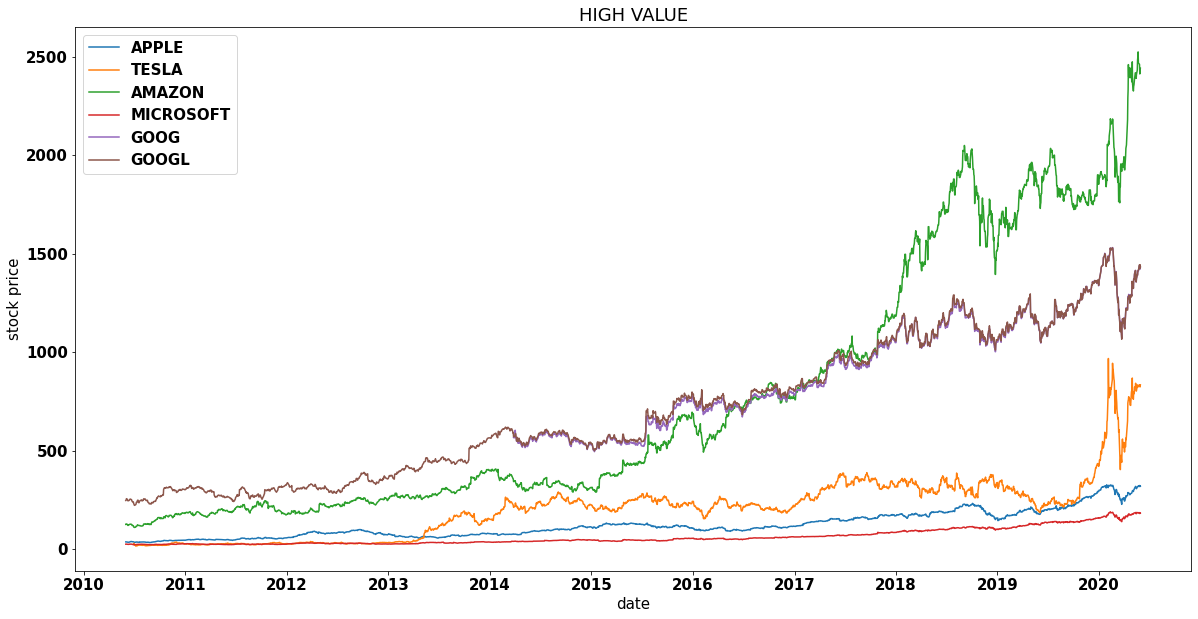

In [ ]:
fig,ax_hv = plt.subplots(figsize=(20,10))

ax_hv.plot(apple_sm['day_date'],apple_sm['high_value'],label='APPLE')
ax_hv.plot(tesla_sm['day_date'],tesla_sm['high_value'],label='TESLA')
ax_hv.plot(amazon_sm['day_date'],amazon_sm['high_value'],label='AMAZON')
ax_hv.plot(microsoft_sm['day_date'],microsoft_sm['high_value'],label='MICROSOFT')
ax_hv.plot(goog_sm['day_date'],goog_sm['high_value'],label='GOOG')
ax_hv.plot(googl_sm['day_date'],googl_sm['high_value'],label='GOOGL')
ax_hv.set_xlabel('date')
ax_hv.set_ylabel('stock price')
ax_hv.set_title('HIGH VALUE')
ax_hv.legend()

### Code References:

#### step - 2
##### (1) https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
##### (1) https://catriscode.com/2021/05/01/tweets-cleaning-with-python/
##### (1) https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis
##### (1) https://towardsdatascience.com/ever-wanted-progress-bars-in-jupyter-bdb3988d9cfc
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)
##### (1)